<a href="https://colab.research.google.com/github/ZUHAIR-5421342/DS-471-Machine-Learning---Project/blob/main/Copy_of_DS471_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Problem Definition

Q: Define the type of machine learning problem you're dealing with (supervised, unsupervised, or semi-supervised). Why?

* We are dealing with a supervised learning problem since we are training our model on already labeled dataset.

Q: What are the input features, and what is the target variable? Explain their significance in the healthcare context.

* Input Features:

    1. age: age of patient in years
        > Significance: Age is a critical risk factor for many diseases, including heart disease. As people age, the risk of cardiovascular problems such as atherosclerosis and hypertension increases.

    2. sex: gender of patient
        - 1: Male
        - 0: Female
        > Significance: Gender differences play a role in the prevalence and manifestation of heart disease. For instance, men are generally at higher risk for heart disease at a younger age, while women's risk increases after menopause.

    3. cp: chest pain type
        - 1: typical angina
        - 2: atypical angina
        - 3: non-anginal pain
        - 4: asymptomatic
        > Significance: Chest pain is one of the main symptoms of heart disease. The different types of chest pain (typical angina, atypical angina, non-anginal pain, asymptomatic) help clinicians determine whether chest pain is likely cardiac-related. For instance, typical angina often suggests coronary artery disease.

    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
        > Significance: High resting blood pressure (hypertension) is a major risk factor for heart disease. Persistent high blood pressure can lead to damage of the arteries, heart attack, and stroke.
    
    5. chol: serum cholestoral in mg/dl
        > Significance: High levels of cholesterol can lead to the buildup of plaques in arteries, increasing the risk of coronary artery disease and heart attack.

    6. fbs: fasting blood sugar (> 120 mg/dl)
        - 1: true
        - 0: false
        > Significance: Fasting blood sugar is used to assess if a patient has diabetes or is pre-diabetic. Diabetes significantly raises the risk of heart disease as it can damage blood vessels and the heart.

    7. restecg: resting electrocardiographic results
        - 0: normal
        - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
        > Significance: Electrocardiograms (ECG) are used to detect abnormalities in the heart's electrical activity. ST-T wave abnormalities or evidence of left ventricular hypertrophy can indicate underlying heart problems, such as ischemia or hypertrophy due to high blood pressure.

    8. thalach: maximum heart rate achieved
        > Significance: The maximum heart rate achieved during physical activity can be an indicator of the heart's ability to handle stress. A lower-than-expected heart rate might suggest heart problems such as ischemia.

    9. exang: exercise induced angina
        - 1: yes
        - 0: no
        > Significance: Exercise-induced angina (chest pain during exercise) often signals coronary artery disease, as it indicates that the heart isn't getting enough blood during periods of exertion.

    10. oldpeak: ST depression induced by exercise relative to rest
        > Significance: ST depression during exercise suggests a lack of blood flow to the heart (ischemia). This is often seen in patients with coronary artery disease.

    11. slop: the slope of the peak exercise ST segment
        - 1: upsloping
        - 2: flat
        - 3: downsloping
        > Significance: The slope of the ST segment during exercise provides insights into heart health. Upsloping is usually normal, while flat or downsloping segments can indicate ischemia and an increased risk of coronary artery disease.

    12. ca: number of major vessels (0-3) colored by fluoroscopy
        > Significance: Fluoroscopy is used to visualize the blood vessels. A higher number of major vessels with blockages detected via fluoroscopy indicates more severe coronary artery disease.

    13. thal:
        - 3: normal
        - 6: fixed defect
        - 7: reversable defect
        > Significance: Thalassemia is a blood disorder that affects the oxygen-carrying capacity of red blood cells. A fixed defect means the damage to the heart muscle is permanent, while a reversible defect suggests ischemia that might improve with treatment.

* Target Variable:
    1. num: diagnosis of heart disease (angiographic disease status)
        - 0: Normal coronary arteries
        - 1: Non-obstructive CAD or significant stenosis in non-significant (<2mm) side branches or slow coronary flow with normal coronary arteries or non-obstructive CAD.
        - 2: Significant (>=2mm) side branch disease or 1 main-vessel disease at any level. except for ostial or proximal LAD lesion.
        - 3: Significant stenosis in 2 main coronary arteries or significant ostial or proximal LAD lesion alone.
        - 4: Obstructive 3-vessel disease or significant left main coronary artery lesion.
        > Significance: This is the target variable we're trying to predict. It represents the extent of narrowing in the coronary arteries
            

# Part 2: Data Preprocessing and Feature Engineering

## Imports

In [ ]:
from ucimlrepo import fetch_ucirepo

import pandas as pd

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [ ]:
# UCI Machine Learning Repository heart disease data ID is 45
heart_disease = fetch_ucirepo(id=45)

In [ ]:
X = heart_disease.data.features
y = heart_disease.data.targets

In [ ]:
heart_disease.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'ID': 231,
  'type': 'NATIVE',
  'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detr

In [ ]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


## Data Cleaning

### Handle Missing Values

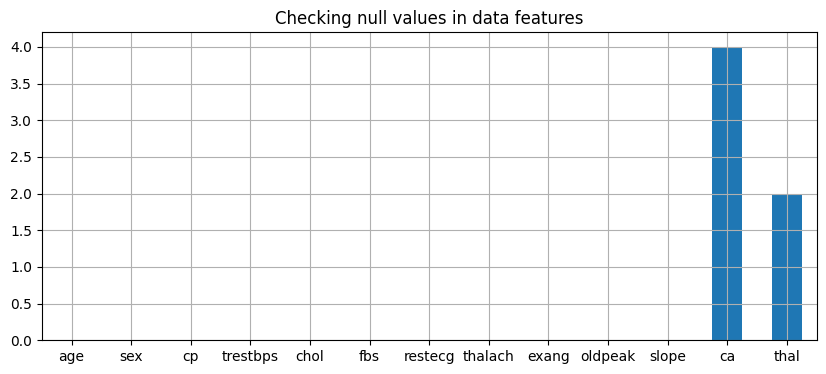


Dropping the rows which contains null values in  entries


In [ ]:
# Checking null values in enteries and dropping entries containing null values

X.isna().sum().plot(kind='bar', grid=True, rot=0, figsize=(10, 4), title='Checking null values in data features')
plt.show()

print("\nDropping the rows which contains null values in  entries")
idx_to_drop = X.isna()[X.isna().sum(axis=1) > 0].index.tolist()
X.drop(axis=0, index=idx_to_drop, inplace=True)
y.drop(axis=0, index=idx_to_drop, inplace=True)

### Identify Outliers

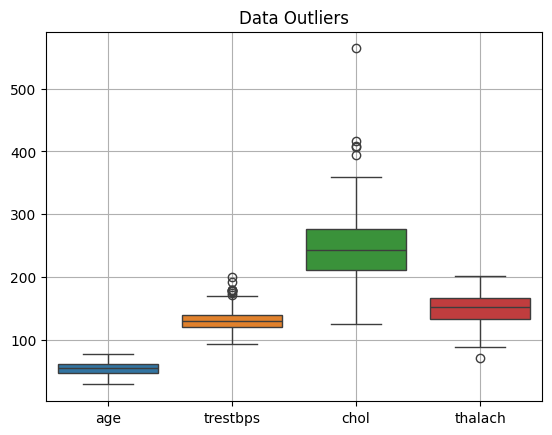

In [ ]:
sns.boxplot(X[['age', 'trestbps', 'chol', 'thalach']])
plt.grid()
plt.title('Data Outliers')
plt.show()

We can see there are no outliers in age but some outliers are present in rest of the 3 columns.

In [ ]:
# Calculating lower and upper bounds to remove outliers using Inter Quartile Range

desc = X.describe()
desc.loc['IQR'] = desc.loc['75%'] - desc.loc['25%']
desc.loc['lower'] = desc.loc['25%'] - 1.5*desc.loc['IQR']
desc.loc['upper'] =  desc.loc['75%'] + 1.5*desc.loc['IQR']
limits = desc[['age', 'trestbps', 'chol', 'thalach']].loc[['lower', 'IQR', 'upper']]

limits

,age,trestbps,chol,thalach
lower,28.5,90.0,113.5,83.5
IQR,13.0,20.0,65.0,33.0
upper,80.5,170.0,373.5,215.5


In [ ]:
# Replacing outliers with the minimum or maximum value of that specific column
for col in ['age', 'trestbps', 'chol', 'thalach']:
    X.loc[X[col] < limits.loc['lower', col], col] = limits.loc['lower', col]
    X.loc[X[col] > limits.loc['upper', col], col] = limits.loc['upper', col]

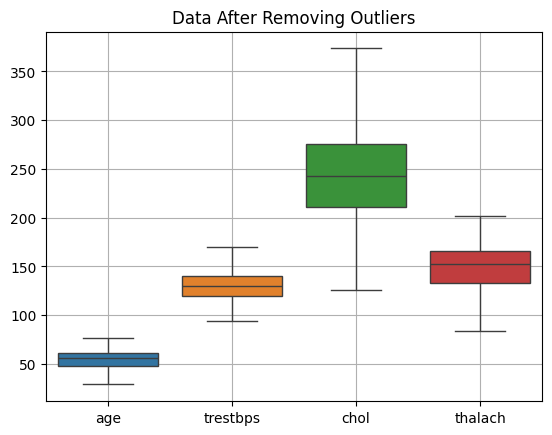

In [ ]:
sns.boxplot(X[['age', 'trestbps', 'chol', 'thalach']])
plt.grid()
plt.title('Data After Removing Outliers')
plt.show()

Now all outliers have been replaced with lower and upper bounds

### Checking duplicate entries

In [ ]:
X[X.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal


There are no duplicate entries in our data

## Feature Engineering

### Scale Numeric Features

In [ ]:
X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.343434,246.260943,149.641414,1.055556
std,9.049736,16.801401,47.836752,22.807957,1.166123
min,29.000000,94.000000,126.000000,83.500000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,170.000000,373.500000,202.000000,6.200000


In [ ]:
"""
Since we want to scale the values exactly on the original values scale
and we don't have outliers anymore in our data
that's why we use min-max scaling method instead of z-score
"""

scaler = MinMaxScaler()
X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [ ]:
X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.532127,0.491361,0.485903,0.558155,0.170251
std,0.188536,0.221071,0.193280,0.192472,0.188084
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.342105,0.343434,0.417722,0.000000
50%,0.562500,0.473684,0.472727,0.586498,0.129032
75%,0.666667,0.605263,0.606061,0.696203,0.258065
max,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the numeric values has been scaled in the data

### Encode Categorical Variables

All categorical variables are already encoded into numeric values.

Q: Which features have missing values, and how did you handle them?

* There are 4 missing values in "ca" and 2 missing values in "thal" column. We dropped the entries which contain missing values in any of these columns as we can not fill in these values by approximation or calculation and rows containing missing values can effect our model performance.

Q: How did you scale the numerical features and encode the categorical features? Why are these steps necessary?

* We have scaled the numeric features of data (age, trestbps, chol and thalach) using min-max scaling method. We have chosed min-max over z-score because we want to scale the values exactly on the original values scale and we don't have outliers anymore in our data.
* The categorical features have already been encoded in to numeric categories so we don't have to encode them further.
* These steps are necessary because the model we train takes numeric scaled data as input. If we provide non-numeric data to model it can not be trained as it fail to perform calculations. And if we provide the model non-scaled data then it can take large computing steps and thus get inefficient.

## Exploratory Data Analysis (EDA)

### Feature Relationship

In [ ]:
# Adding target column with features in order to analyze the relationship

X['num'] = y['num']

In [ ]:
X.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.298085,0.194391,0.132062,0.149917,-0.394325,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.057954,-0.182316,0.038850,0.033897,-0.059573,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.040668,0.075555,-0.057663,0.063905,-0.339680,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.298085,-0.057954,-0.040668,1.000000,0.143006,0.171275,0.148415,-0.056184,0.054227,0.184457,0.113365,0.097645,0.131568,0.153834
chol,0.194391,-0.182316,0.075555,0.143006,1.000000,0.014482,0.156361,-0.008542,0.075047,0.028376,-0.019731,0.126325,-0.005615,0.078010
fbs,0.132062,0.038850,-0.057663,0.171275,0.014482,1.000000,0.068831,-0.008649,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.148415,0.156361,0.068831,1.000000,-0.074568,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394325,-0.059573,-0.339680,-0.056184,-0.008542,-0.008649,-0.074568,1.000000,-0.387906,-0.349765,-0.390397,-0.271636,-0.278094,-0.421522
exang,0.096489,0.143581,0.377525,0.054227,0.075047,-0.000893,0.081874,-0.387906,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.184457,0.028376,0.008311,0.113726,-0.349765,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


We can see correlation in between the following features with the target variable:

* cp
* thalach (-ve)
* oldpeak
* ca
* thal

Clusters in numeric data features with respect to target variable

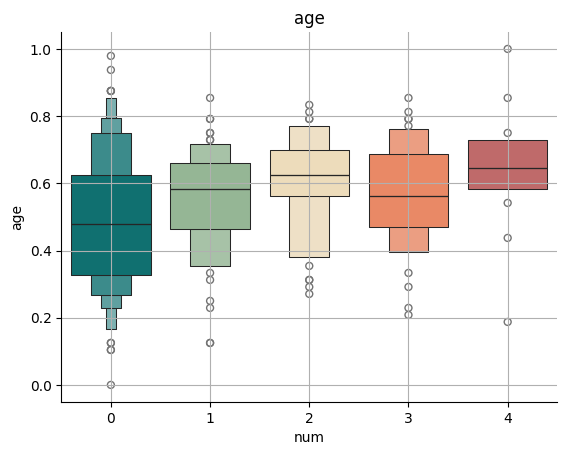

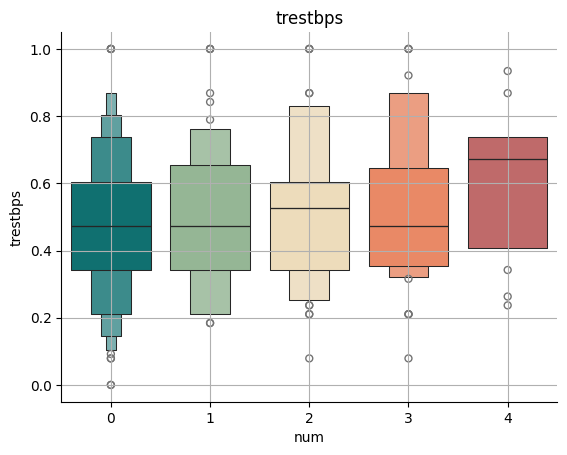

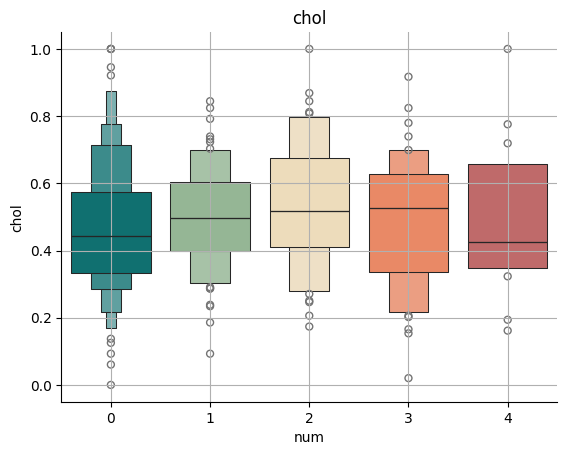

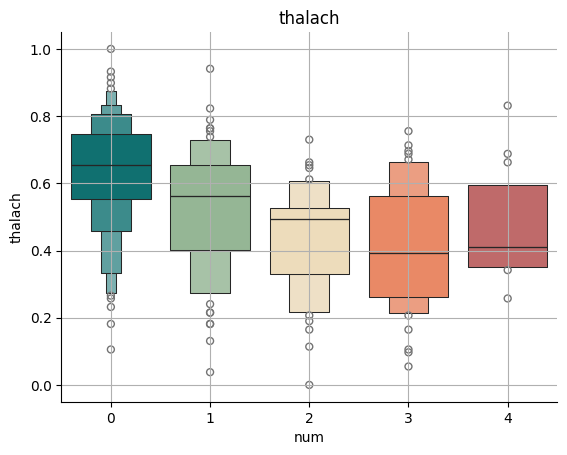

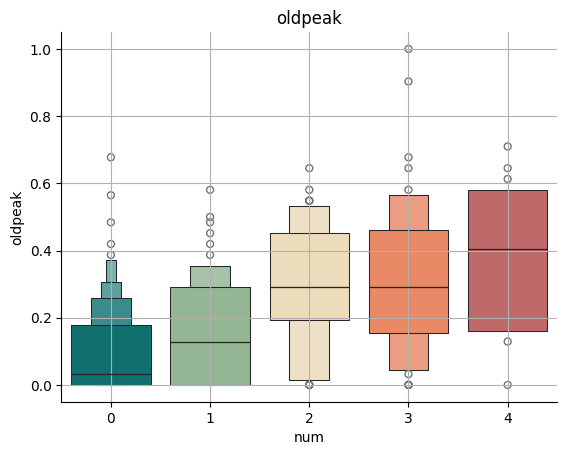

In [ ]:
# Features to plot
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

my_pal = {"0": "teal", "1": "darkseagreen", "2":"wheat", "3":'coral', '4':'indianred'}

# Iterate over the features and create separate box plots
for feature in features:
    sns.boxenplot(data=X, x='num', y=feature, palette=my_pal)
    sns.despine()
    plt.grid()
    plt.title(feature)
    plt.show()

We can observe the following patterns:
* Elder patients have higher CAD levels.
* Higher resting blood pressure (trestbps) have Obstructive 3-vessel stage disease.
* We are unable to observe the relationship between cholestrol and disease levels in upper bounds but we can observe the lower bounds that cholestrol level lower bound for CAD disease stages are higher than the lower bound for healthy patients
* Higher thalach (maximum heart rate achieved during physical acitivities) tends to have normal coronary arteries.


Checking scatter plots to find any clusters

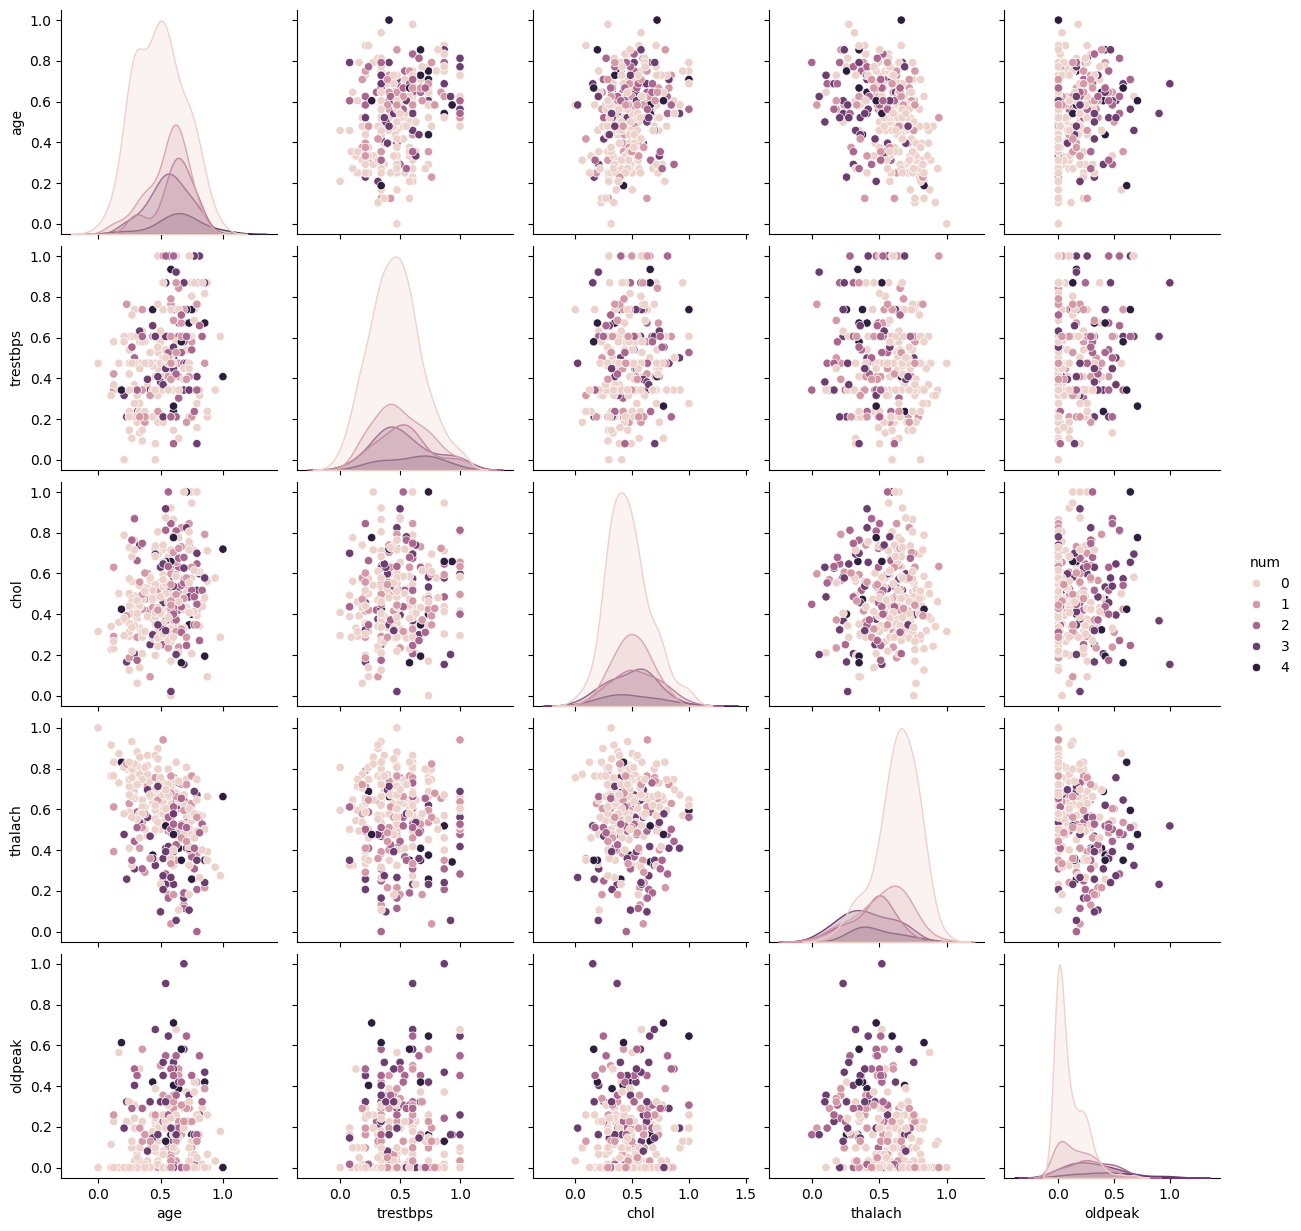

In [ ]:
sns.pairplot(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']], hue='num')

We can observe clusters in between the following pairs:
* age vs chol
* age vs thalach
* trestbps vs thalach
* chol vs thalach
* oldpeak vs thalach


Checking categorical relationship with target variables

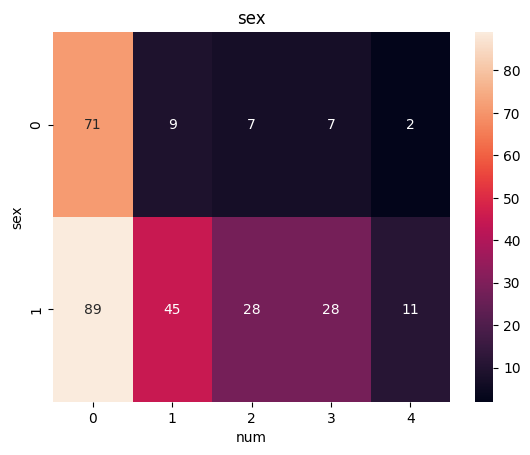

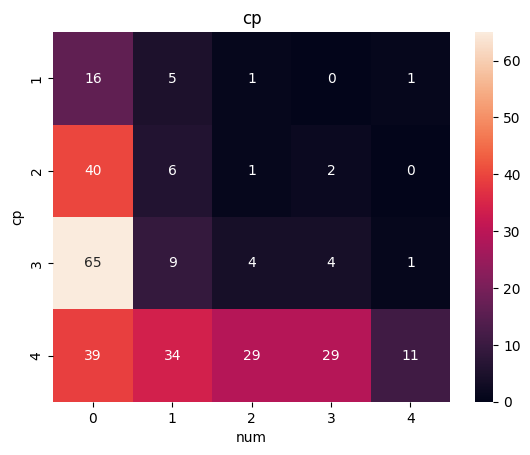

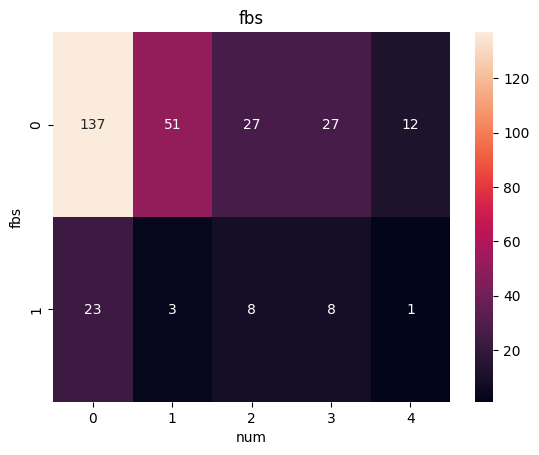

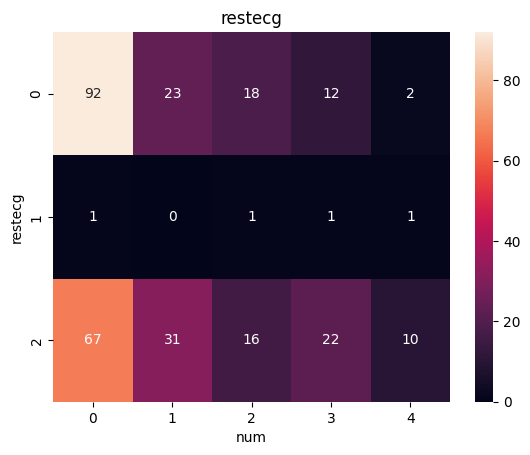

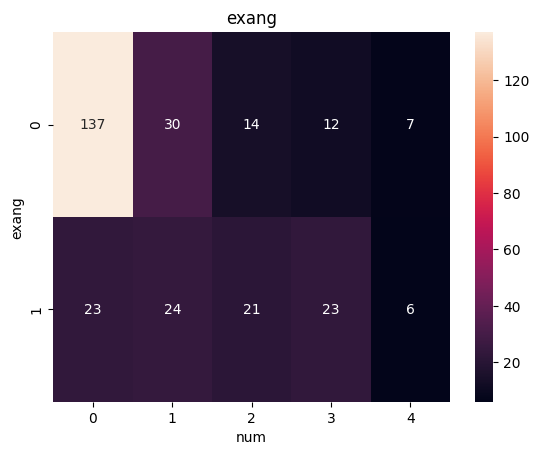

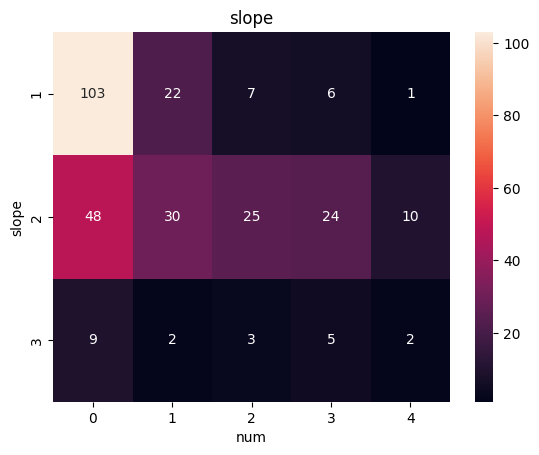

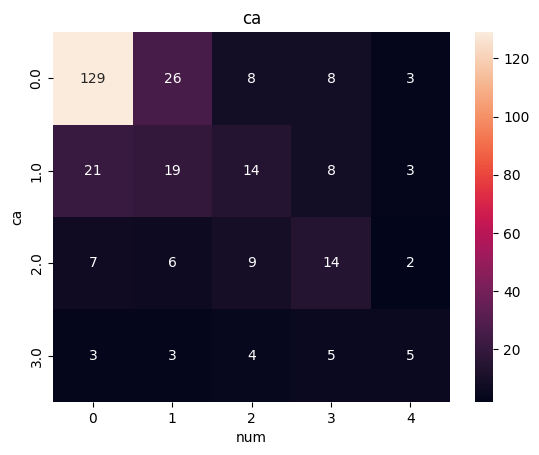

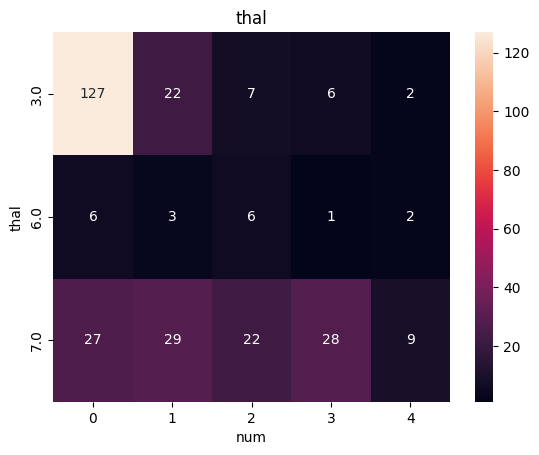

In [ ]:
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    cont = pd.crosstab(X[col], X['num'])
    sns.heatmap(cont, annot=True, fmt='d')
    plt.title(col)
    plt.show()
    print("="*65)

* Males have mostly high heart disease status as compared to Females.
* The relation between cp and num shows a person could have a heart disease without any kind of anginal symptoms.
* Fasting blood suger if > 120 shows the person is most probably have a heart disease.
* If ECG shows left ventricular hypertrophy then it have more chances to have higher statge of heart disease.
* If chest pain happen during exercise then it could be an issue as it indicates a little probability of having heart disease.
* If the slope of the peak exercise ST segment is flat, then it shows indication towards heart disease.
* More number of blocked blood vessels indicate high chances of heart disease.
* If a person have thalassemia disorder in blood then he/she will most probably have a heart disease too.

# Part 3: Model Selection and Training

In [ ]:
# Removing the target variable from the data features matrix
X.drop(columns=['num'], inplace=True)

## PCA

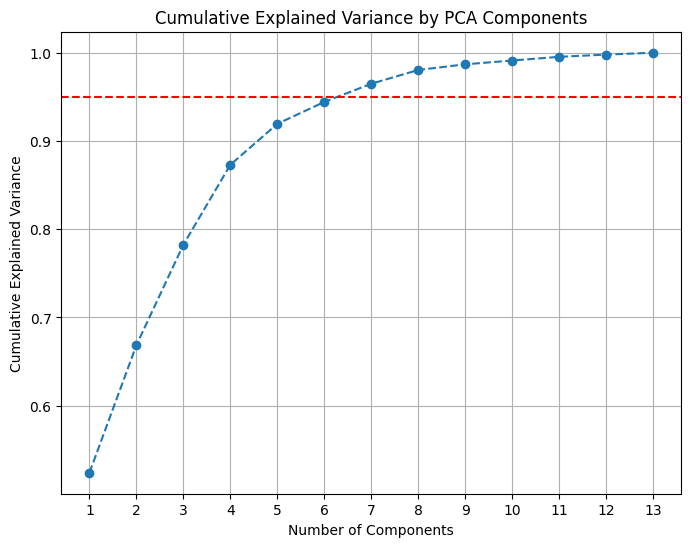

In [ ]:
pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')  # Example line for 95% variance
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.show()

In [ ]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(
    data=principalComponents,
)

In [ ]:
pca_df.corr().style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5
0,1.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
1,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000
2,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000
3,-0.000000,0.000000,-0.000000,1.000000,-0.000000,-0.000000
4,-0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.000000
5,-0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000


We can see that after reducing the data dimensions it removed the correlation between features as well.

Checking if target variable is imbalanced or balanced

<Axes: title={'center': 'Checking balance in target variable'}, xlabel='num'>

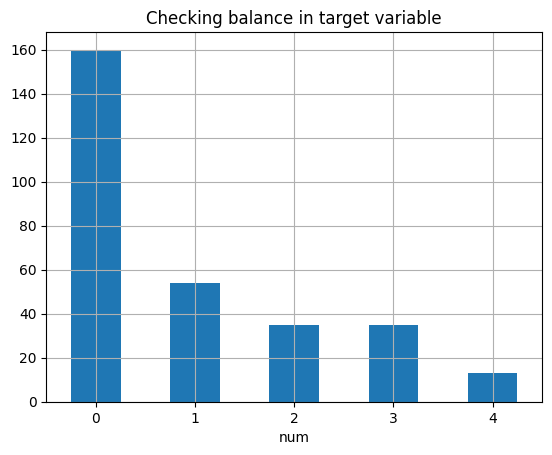

In [ ]:
y['num'].value_counts().plot(kind='bar', grid=True, rot=0, title='Checking balance in target variable')

In [ ]:
# Splitting the data in train and test set.
# We use stratified splitting technique since our target variable has imbalanced classes

x_train, x_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42, stratify=y)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],    # Minimum number of samples required to be a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy')

# Train the model using cross-validation and find the best hyperparameters
grid_search.fit(pca_df, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.3f}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10}
Best Cross-validation Accuracy: 0.609


In [ ]:
model = grid_search.best_estimator_

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

accuracy = accuracy_score(y_test.to_numpy().flatten(), y_pred)
precision = precision_score(y_test.to_numpy().flatten(), y_pred, average='macro')
recall = recall_score(y_test.to_numpy().flatten(), y_pred, average='macro')
f1 = f1_score(y_test.to_numpy().flatten(), y_pred, average='macro')
roc_auc = roc_auc_score(y_bin, y_prob, multi_class='ovr')
conf_matrix = confusion_matrix(y_test.to_numpy().flatten(), y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)

Accuracy: 0.72
Precision: 0.5536507936507936
Recall: 0.5054383116883117
F1 Score: 0.4909243697478991
ROC AUC: 0.89

Confusion Matrix:
 [[31  0  1  0  0]
 [ 4  3  3  0  1]
 [ 0  1  5  1  0]
 [ 1  0  2  4  0]
 [ 0  0  3  0  0]]


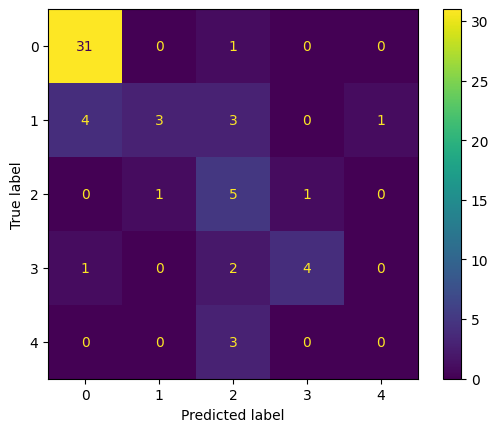

In [ ]:
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4]).plot()

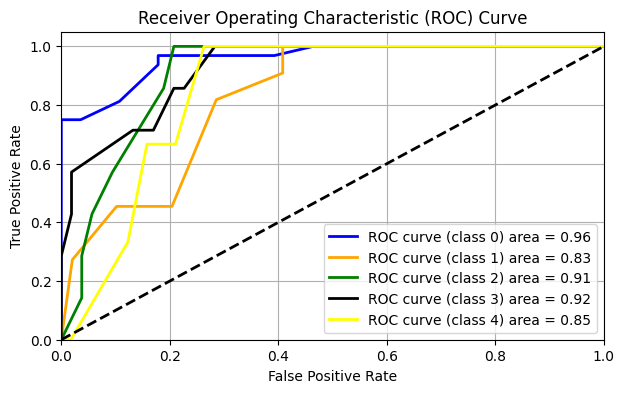

In [ ]:
n_classes = y_bin.shape[1]

# Initialize plot
plt.figure(figsize=(7, 4))

# Colors for each class
colors = ['blue', 'orange', 'green', 'black', 'yellow']

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = metrics.roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i}) area = {roc_auc:.2f}')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend(loc="lower right")
plt.show()

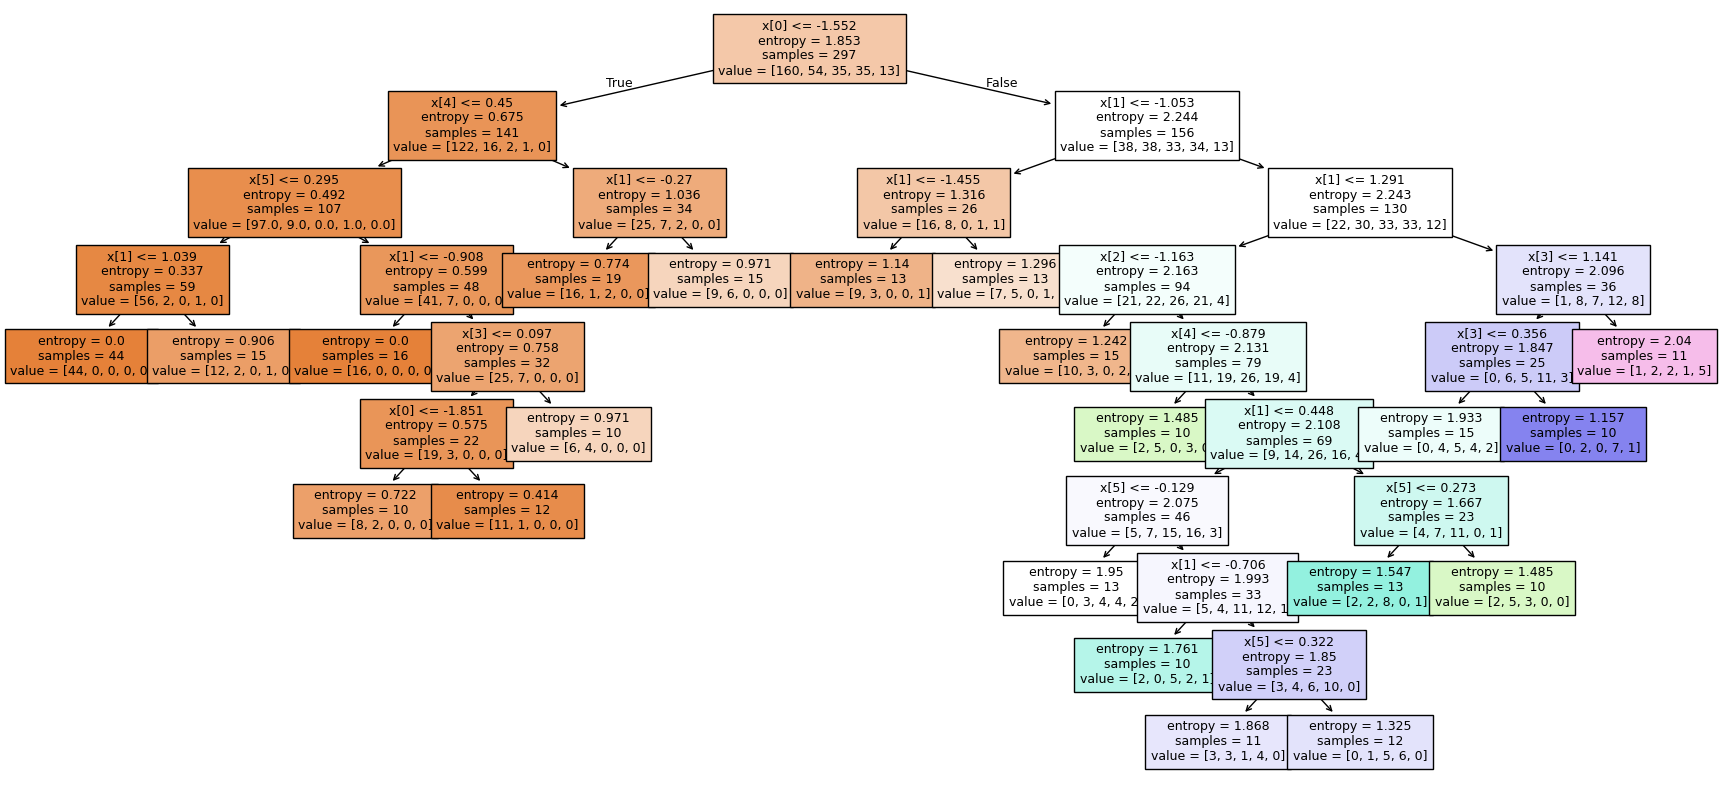

In [ ]:
plt.figure(figsize=(22, 10))
tree.plot_tree(model, filled=True, fontsize=9)
plt.show()

## Random Forests (ensemble method)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],    # Minimum number of samples required to be a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy')

# Train the model using cross-validation and find the best hyperparameters
grid_search.fit(pca_df, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.3f}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Accuracy: 0.596


In [ ]:
model = grid_search.best_estimator_

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

accuracy = accuracy_score(y_test.to_numpy().flatten(), y_pred)
precision = precision_score(y_test.to_numpy().flatten(), y_pred, average='macro')
recall = recall_score(y_test.to_numpy().flatten(), y_pred, average='macro')
f1 = f1_score(y_test.to_numpy().flatten(), y_pred, average='macro')
roc_auc = roc_auc_score(y_bin, y_prob, multi_class='ovr')
conf_matrix = confusion_matrix(y_test.to_numpy().flatten(), y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)

Accuracy: 1.00
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.00

Confusion Matrix:
 [[32  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  3]]


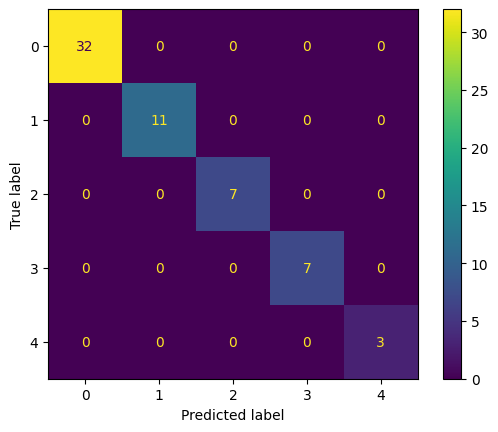

In [ ]:
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4]).plot()

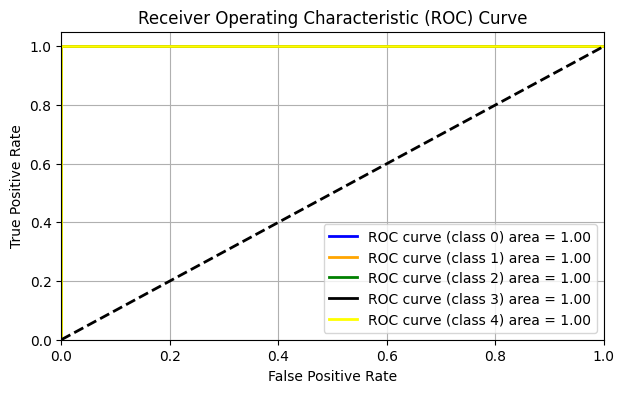

In [ ]:
n_classes = y_bin.shape[1]

# Initialize plot
plt.figure(figsize=(7, 4))

# Colors for each class
colors = ['blue', 'orange', 'green', 'black', 'yellow']

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = metrics.roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i}) area = {roc_auc:.2f}')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend(loc="lower right")
plt.show()

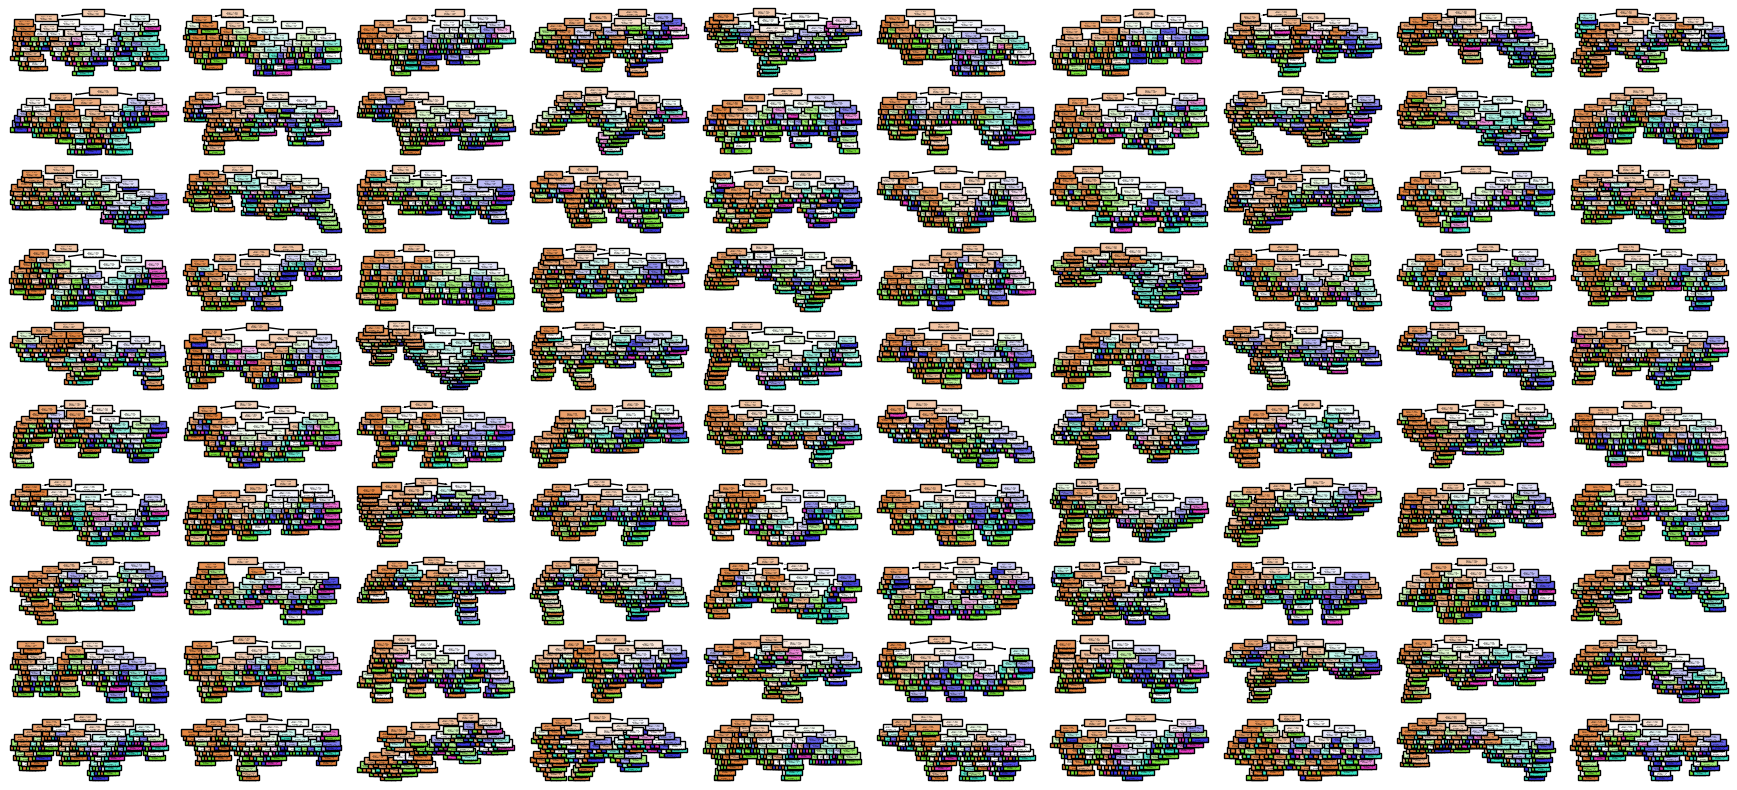

In [ ]:
idxs = []
for i in range(10):
    for j in range(10):
        idxs.append((i, j))

fig, ax = plt.subplots(figsize=(22, 10), nrows=10, ncols=10)
i = 0
for estimator in model.estimators_:
    m, n = idxs[i]
    tree.plot_tree(estimator, filled=True, ax=ax[m][n])
    i += 1
plt.show()

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model = SVC(probability=True)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'gamma': ['scale', 'auto'],            # Kernel coefficient (for 'rbf', 'poly', and 'sigmoid')
    'degree': [2, 3, 4]                   # Degree of the polynomial kernel function (used if 'poly' kernel)
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy')

# Train the model using cross-validation and find the best hyperparameters
grid_search.fit(pca_df, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.3f}")

Best Hyperparameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-validation Accuracy: 0.586


In [ ]:
model = grid_search.best_estimator_

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

accuracy = accuracy_score(y_test.to_numpy().flatten(), y_pred)
precision = precision_score(y_test.to_numpy().flatten(), y_pred, average='macro')
recall = recall_score(y_test.to_numpy().flatten(), y_pred, average='macro')
f1 = f1_score(y_test.to_numpy().flatten(), y_pred, average='macro')
roc_auc = roc_auc_score(y_bin, y_prob, multi_class='ovr')
conf_matrix = confusion_matrix(y_test.to_numpy().flatten(), y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)

Accuracy: 0.68
Precision: 0.4015873015873016
Recall: 0.41558441558441556
F1 Score: 0.4045886775762937
ROC AUC: 0.87

Confusion Matrix:
 [[32  0  0  0  0]
 [ 4  4  2  1  0]
 [ 0  2  2  3  0]
 [ 0  1  3  3  0]
 [ 0  1  0  2  0]]


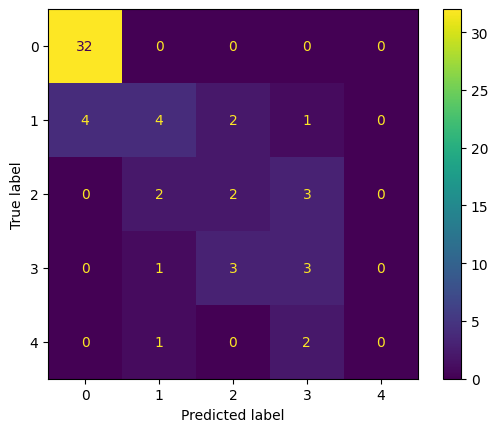

In [ ]:
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4]).plot()

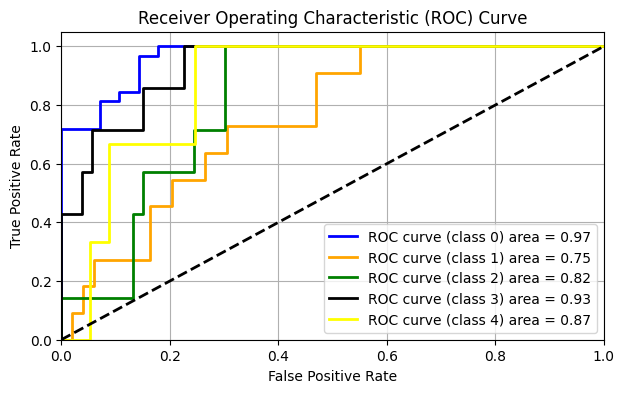

In [ ]:
n_classes = y_bin.shape[1]

# Initialize plot
plt.figure(figsize=(7, 4))

# Colors for each class
colors = ['blue', 'orange', 'green', 'black', 'yellow']

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = metrics.roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i}) area = {roc_auc:.2f}')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model = LogisticRegression(solver='liblinear', multi_class='ovr')

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],    # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization types
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and elasticnet
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy')

# Train the model using cross-validation and find the best hyperparameters
grid_search.fit(pca_df, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.3f}")

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.609


In [ ]:
model = grid_search.best_estimator_

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

accuracy = accuracy_score(y_test.to_numpy().flatten(), y_pred)
precision = precision_score(y_test.to_numpy().flatten(), y_pred, average='macro')
recall = recall_score(y_test.to_numpy().flatten(), y_pred, average='macro')
f1 = f1_score(y_test.to_numpy().flatten(), y_pred, average='macro')
roc_auc = roc_auc_score(y_bin, y_prob, multi_class='ovr')
conf_matrix = confusion_matrix(y_test.to_numpy().flatten(), y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)

Accuracy: 0.63
Precision: 0.3754662004662005
Recall: 0.34025974025974026
F1 Score: 0.33232847376657604
ROC AUC: 0.86

Confusion Matrix:
 [[32  0  0  0  0]
 [ 5  3  0  3  0]
 [ 0  3  1  3  0]
 [ 2  2  1  2  0]
 [ 0  0  0  3  0]]


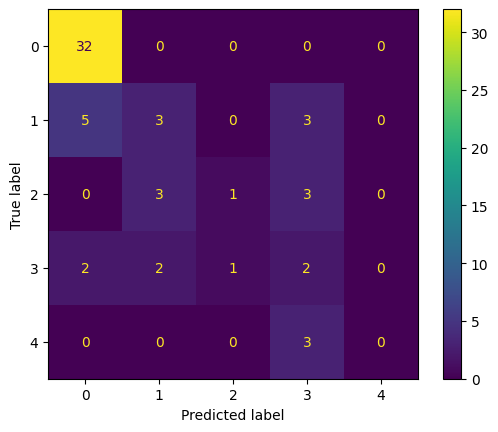

In [ ]:
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4]).plot()

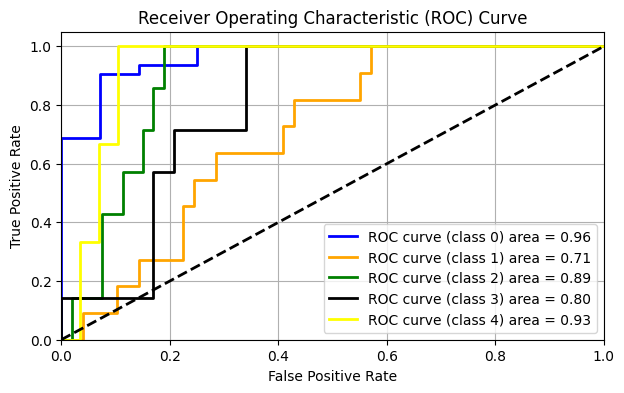

In [ ]:
n_classes = y_bin.shape[1]

# Initialize plot
plt.figure(figsize=(7, 4))

# Colors for each class
colors = ['blue', 'orange', 'green', 'black', 'yellow']

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = metrics.roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i}) area = {roc_auc:.2f}')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend(loc="lower right")
plt.show()

## A Basic Neural Network Using Keras

In [ ]:
# Build the model
model = Sequential()

# Input layer with 13 features and a Dense hidden layer
model.add(Dense(64, input_dim=6, activation='relu'))

# Another hidden layer
model.add(Dense(32, activation='relu'))

# Dropout layer to overcome the overfitting issue
model.add(Dropout(0.5))

# Another hidden layer
model.add(Dense(16, activation='relu'))

# Dropout layer to overcome the overfitting issue
model.add(Dropout(0.5))

# Output layer with 5 units (for 5 classes) and softmax activation
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Suitable for multiclass classification
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,141 (12.27 KB)

 Trainable params: 3,141 (12.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Converting target variable into one hot code encoding
y_one_hot = to_categorical(y_train, num_classes=5)

In [ ]:
history = model.fit(x_train, y_one_hot, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.2231 - loss: 1.6220 - val_accuracy: 0.3542 - val_loss: 1.5699
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2898 - loss: 1.5622 - val_accuracy: 0.4583 - val_loss: 1.5107
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4174 - loss: 1.4900 - val_accuracy: 0.4792 - val_loss: 1.4623
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4473 - loss: 1.3917 - val_accuracy: 0.4792 - val_loss: 1.4215
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4529 - loss: 1.3221 - val_accuracy: 0.4792 - val_loss: 1.3782
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4518 - loss: 1.3500 - val_accuracy: 0.4792 - val_loss: 1.3455
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5425 - loss: 1.2656 - val_accuracy: 0.4792 - val_loss: 1.3115
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4813 - loss: 1.2416 - val_accuracy: 0.4792 -

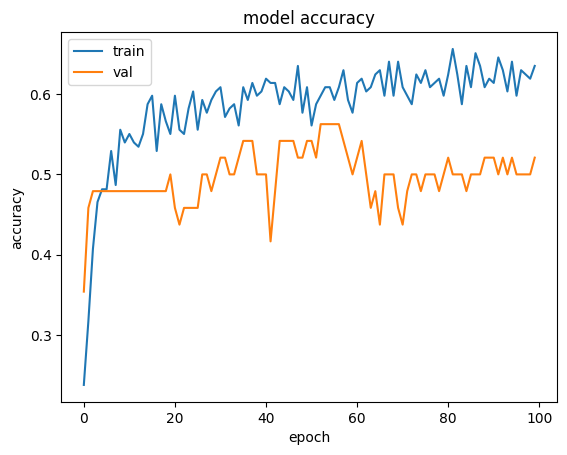

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(x_test)
y_pred = tf.argmax(pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step


In [ ]:
from tensorflow import keras

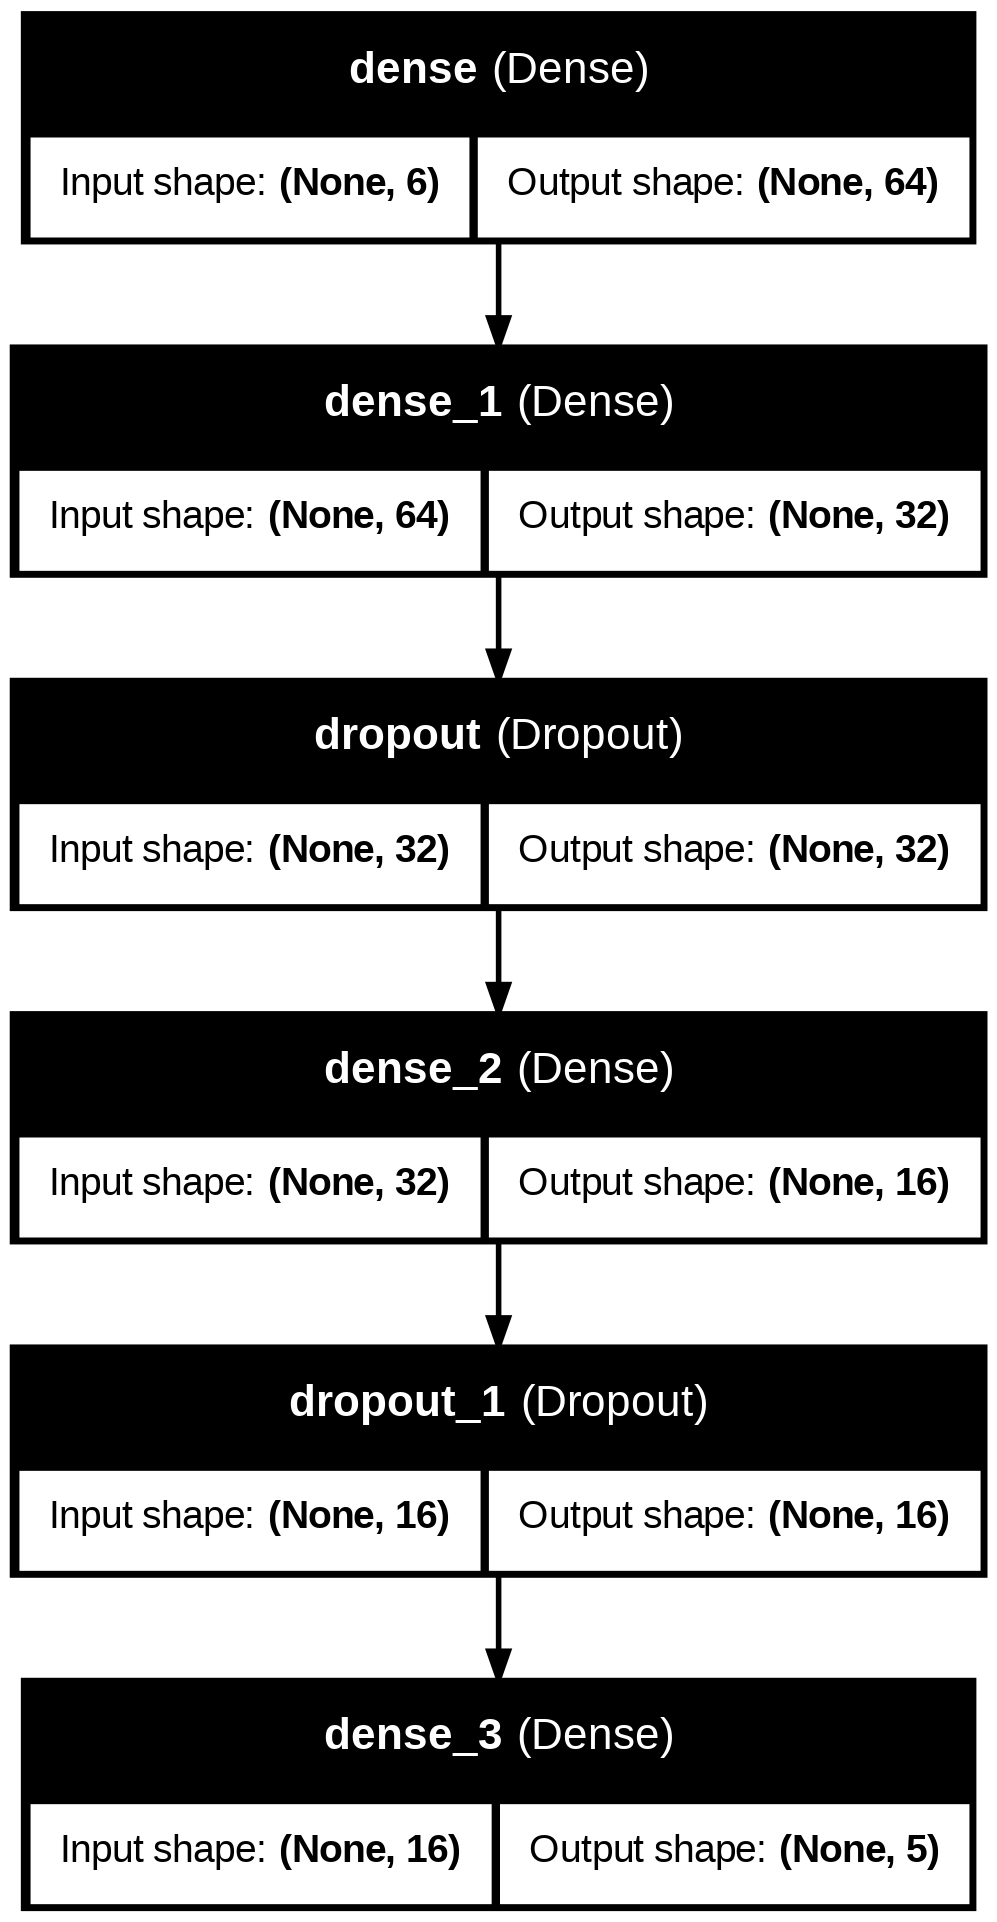

In [ ]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

accuracy = accuracy_score(np.array(y_pred).flatten(), y_pred)
precision = precision_score(np.array(y_pred).flatten(), y_pred, average='macro')
recall = recall_score(np.array(y_pred).flatten(), y_pred, average='macro')
f1 = f1_score(np.array(y_pred).flatten(), y_pred, average='macro')
roc_auc = roc_auc_score(y_bin, pred)
conf_matrix = confusion_matrix(np.array(y_pred).flatten(), y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)

Accuracy: 1.00
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 0.81

Confusion Matrix:
 [[42  0  0]
 [ 0  4  0]
 [ 0  0 14]]


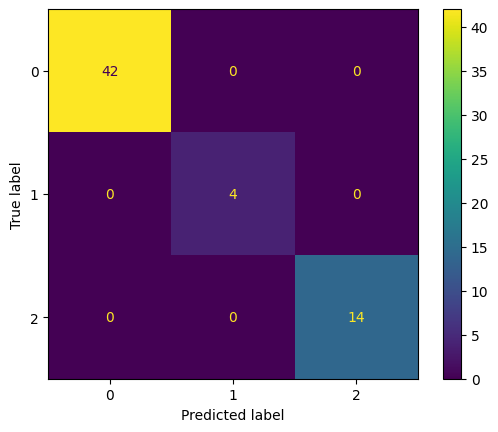

In [ ]:
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[i for i in range(len(conf_matrix))]).plot()

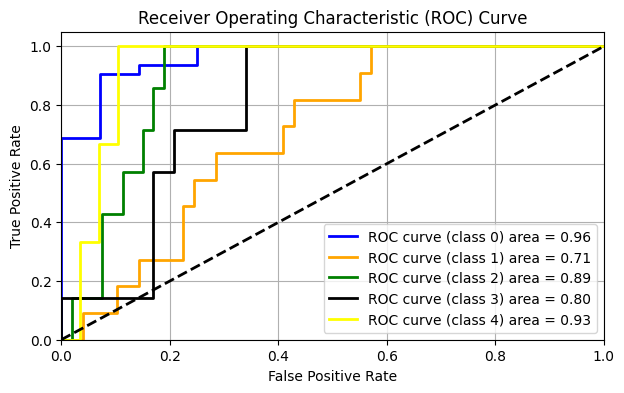

In [ ]:
n_classes = y_bin.shape[1]

# Initialize plot
plt.figure(figsize=(7, 4))

# Colors for each class
colors = ['blue', 'orange', 'green', 'black', 'yellow']

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = metrics.roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i}) area = {roc_auc:.2f}')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend(loc="lower right")
plt.show()

The Keras neural network seems to have the best accuracy to consider for this classification but it has been over fitted on our data that is why we have to neglect it for now. Apart from that neral network the best model is Random Forest classifier with ensemble method for this classification.